In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [56]:
def histplot_all_dataframe(df_num):
  # Calculate grid dimensions
  n_cols = len(df_num.columns)
  n_rows = int(np.ceil(n_cols / 3))

  # Create subplots
  fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
  axes = axes.flatten()

  # Plot each column
  for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

  # Hide empty subplots
  for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

  plt.tight_layout()
  plt.show()

def countplot_all_dataframe(df):
  # Calculate grid dimensions
  n_cols = len(df.columns)
  n_rows = int(np.ceil(n_cols / 3))

  # Create subplots
  fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
  axes = axes.flatten()

  # Plot each column
  for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i], order=df[column].value_counts().index)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

  # Hide empty subplots
  for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

  plt.tight_layout()
  plt.show()

def boxplot_all_dataframe(df):
  # Calculate grid dimensions
  n_cols = len(df.columns)
  n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row

  # Create subplots
  fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
  axes = axes.flatten()

  # Plot each column
  for i, column in enumerate(df.columns):
      sns.boxplot(y=df[column], ax=axes[i])
      axes[i].set_title(f'Boxplot of {column}')
      axes[i].set_ylabel(column)

  # Hide empty subplots
  for i in range(n_cols, len(axes)):
      axes[i].set_visible(False)

  plt.tight_layout()
  plt.show()

def bivariate_scatter_plot(df, target):
  fig = plt.figure(figsize=(20,20))
  for index in range(len(df.columns)):
      plt.subplot(10,5,index+1)
      sns.scatterplot(x=df.iloc[:,index], y=target, data=df.dropna())
  fig.tight_layout(pad=1.0)


def check_same_value_more_than_percentage(df, percentage):
  if percentage > 1.0 or percentage < 0.0:
    raise Exception('Percentage must be between 0 and 1')
  found_one = False
  for col in df.columns:
    if df[col].value_counts().max() >= df.shape[0] * percentage:
      print(f"Column {col}; Repeated value: {df[col].value_counts(ascending=False).index[0]}; {df[col].value_counts().max()} times of {df.shape[0]}")
      found_one = True
  if not found_one: print(f"There are no columns that have the same value repeated more than {percentage*100}% of the time")

In [57]:
train = pd.read_csv('train.csv')
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [58]:
test = pd.read_csv("test.csv")
test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


For this notebook what I will do is first do the whole workflow and then, when I have the whole workflow of the models and predictions, start improving the data/features.

## First, understand the variables and some basic exploration

null values, null rows, duplicates, errors, data types, outliers, distributions, bivariable distributions

age: Age of the client (numeric) \
job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.) \
marital: Marital status (categorical: "married", "single", "divorced") \
education: Level of education (categorical: "primary", "secondary", "tertiary", "unknown") \
default: Has credit in default? (categorical: "yes", "no") \
balance: Average yearly balance in euros (numeric) \
housing: Has a housing loan? (categorical: "yes", "no") \
loan: Has a personal loan? (categorical: "yes", "no") \
contact: Type of communication contact (categorical: "unknown", "telephone", "cellular") \
day: Last contact day of the month (numeric, 1-31) \
month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec") \
duration: Last contact duration in seconds (numeric) \
campaign: Number of contacts performed during this campaign (numeric) \
pdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted) \
previous: Number of contacts performed before this campaign (numeric) \
poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success") \
y: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")

At first glanze: \
I notice day and month can be joined into one variable \
Id can be removed

In [59]:
test_with_target = test.copy(deep=True)
test_with_target['y'] = -1

all_data = pd.concat([train, test_with_target])

all_data.drop('id', axis=1, inplace=True)

It seems there are no null values neither in train or test

In [60]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   age        1000000 non-null  int64 
 1   job        1000000 non-null  object
 2   marital    1000000 non-null  object
 3   education  1000000 non-null  object
 4   default    1000000 non-null  object
 5   balance    1000000 non-null  int64 
 6   housing    1000000 non-null  object
 7   loan       1000000 non-null  object
 8   contact    1000000 non-null  object
 9   day        1000000 non-null  int64 
 10  month      1000000 non-null  object
 11  duration   1000000 non-null  int64 
 12  campaign   1000000 non-null  int64 
 13  pdays      1000000 non-null  int64 
 14  previous   1000000 non-null  int64 
 15  poutcome   1000000 non-null  object
 16  y          1000000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 137.3+ MB


In [61]:
print("Duplicated rows:")
print(all_data[all_data.duplicated()])

Duplicated rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [62]:
all_data_numerical = all_data.select_dtypes('number')
all_data_categorical = all_data.select_dtypes('object')

all_data_categorical['y'] = all_data_numerical['y'] # Target variable is categorical
all_data_numerical.drop('y', axis=1, inplace=True)

In [63]:
all_data_numerical

,age,balance,day,duration,campaign,pdays,previous
0,42,7,25,117,3,-1,0
1,38,514,18,185,1,-1,0
2,36,602,14,111,2,-1,0
3,27,34,28,10,2,-1,0
4,26,889,3,902,1,-1,0
...,...,...,...,...,...,...,...
249995,43,0,18,65,2,-1,0
249996,40,522,19,531,1,189,1
249997,63,33,3,178,1,92,8
249998,50,2629,30,163,2,-1,0


In [64]:
all_data_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,technician,married,secondary,no,no,no,cellular,aug,unknown,0
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown,0
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,0
3,student,single,secondary,no,yes,no,unknown,may,unknown,0
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,1
...,...,...,...,...,...,...,...,...,...,...
249995,management,married,tertiary,no,yes,no,cellular,nov,unknown,-1
249996,services,married,unknown,no,yes,no,cellular,nov,failure,-1
249997,retired,married,primary,no,no,no,cellular,jul,success,-1
249998,blue-collar,married,primary,no,yes,no,unknown,may,unknown,-1


All numerical variables are highly skewed to the right except age wich is also skewed to the right but no so bad as the other ones \


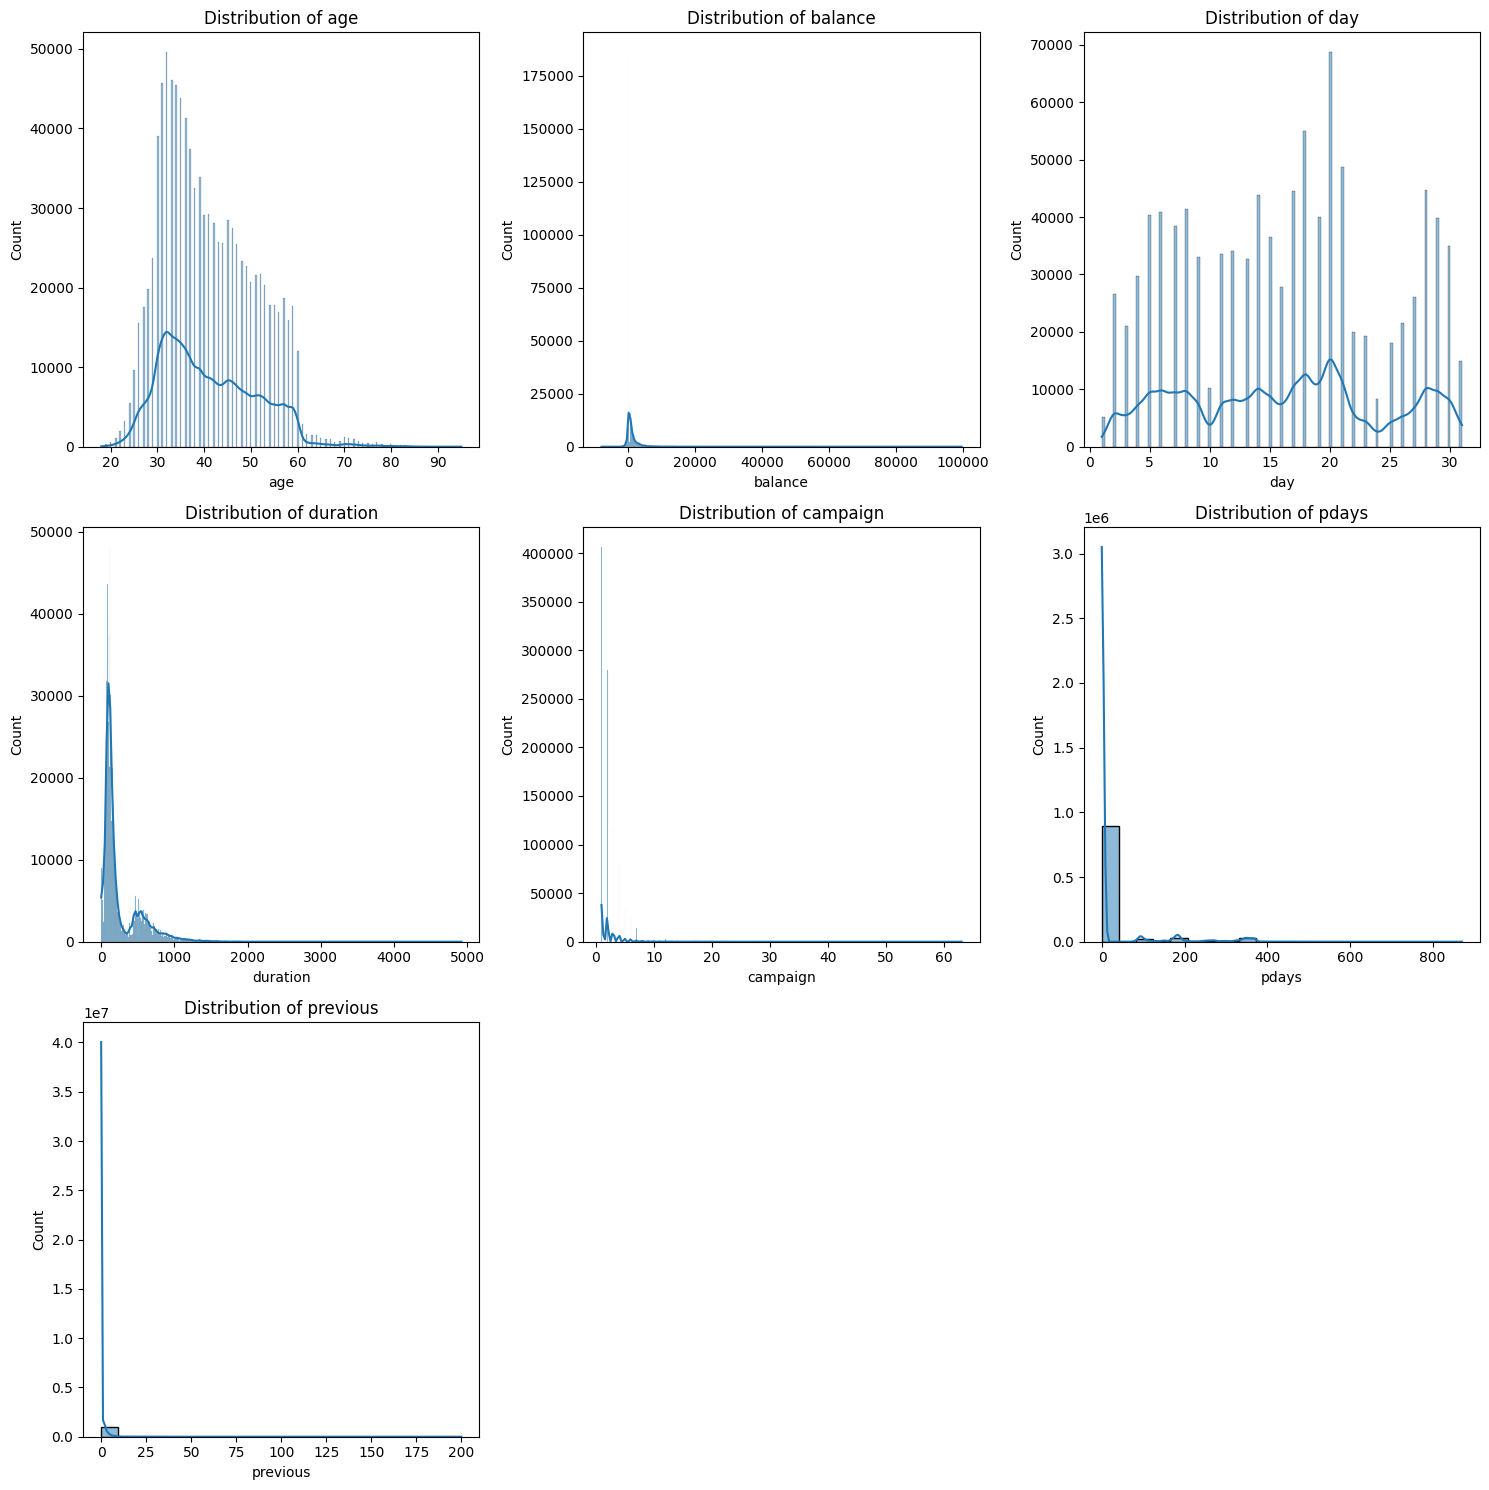

In [65]:
histplot_all_dataframe(all_data_numerical)

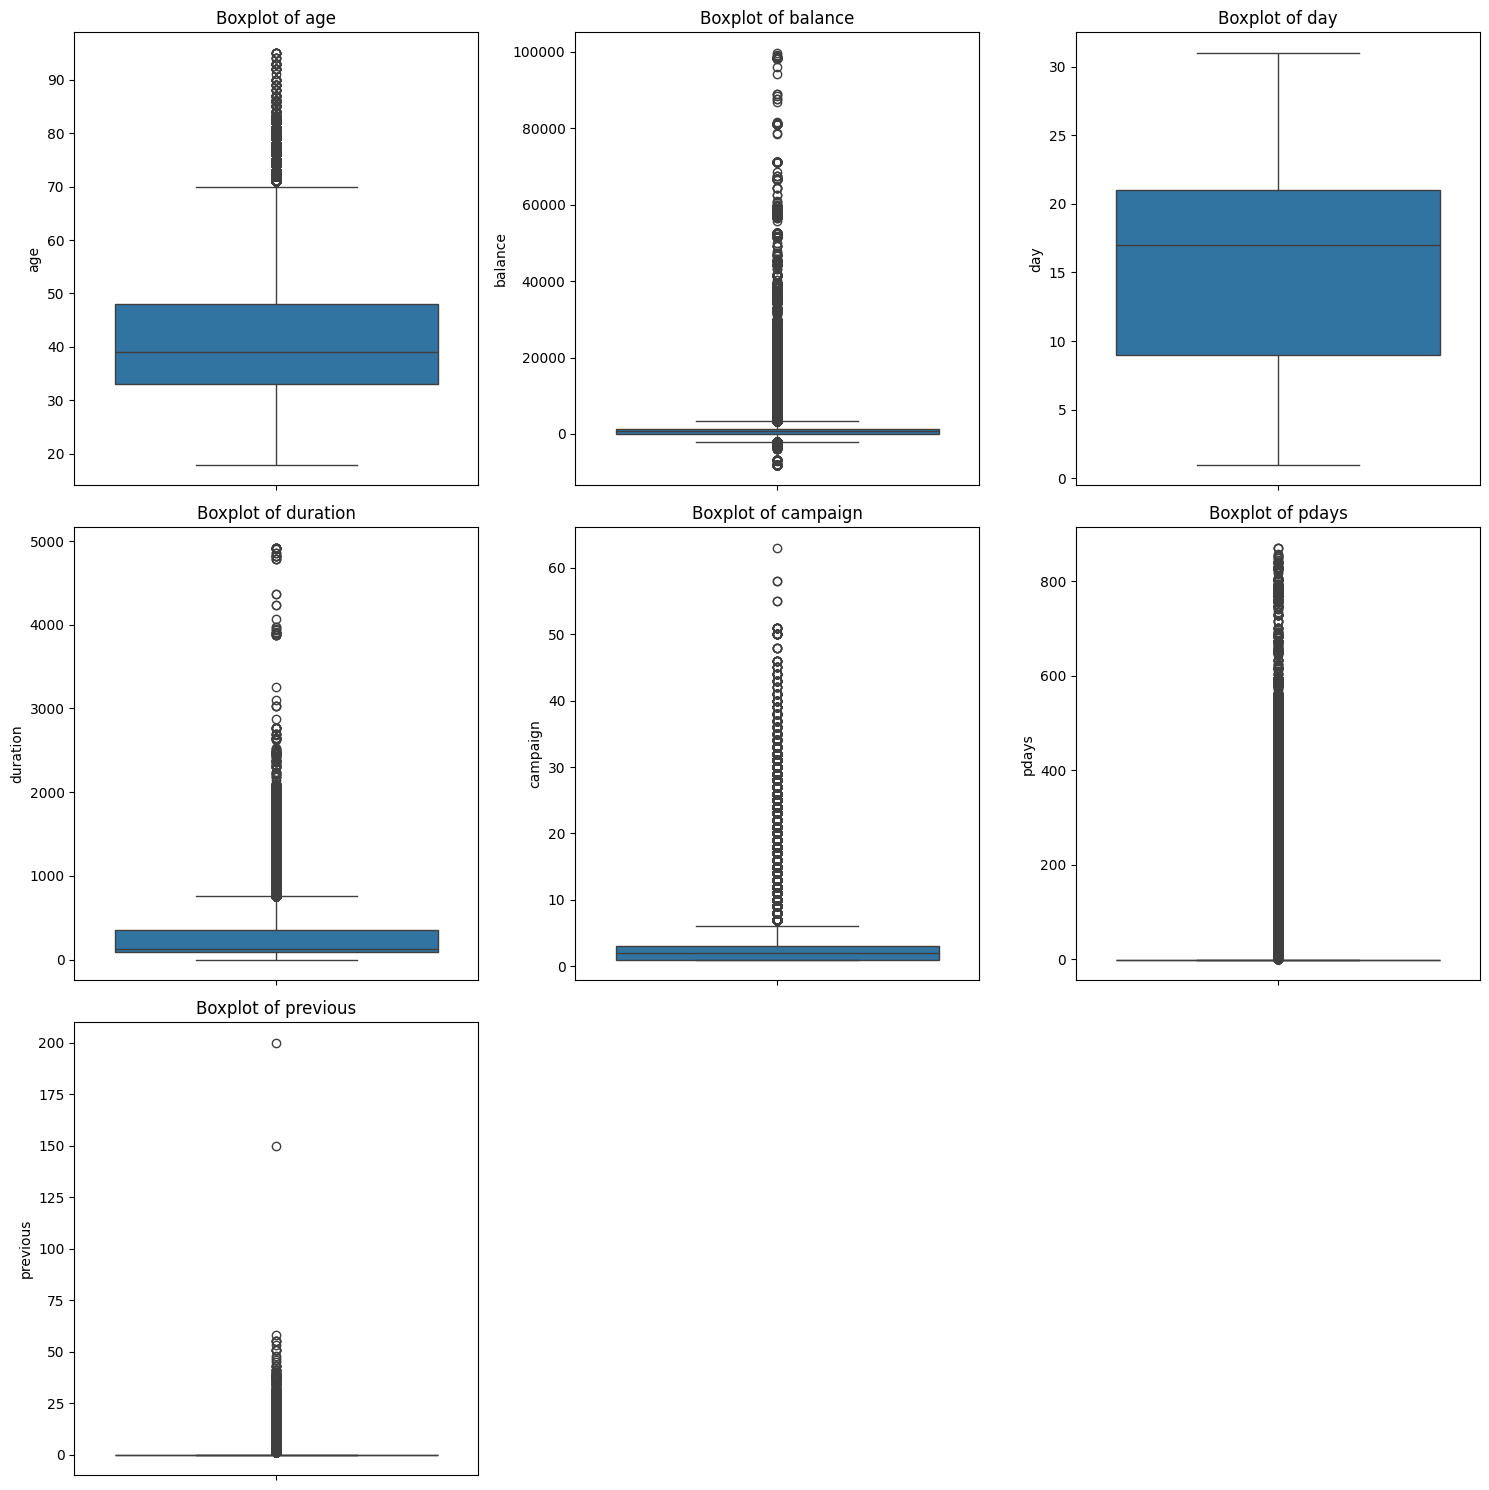

In [66]:
boxplot_all_dataframe(all_data_numerical)

In [67]:
all_data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,40.927879,1202.407136,16.116924,256.007423,2.576143,22.379557,0.299841
std,10.094523,2812.750998,8.252748,272.268420,2.716302,77.219149,1.348254
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,21.000000,359.000000,3.000000,-1.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000


In [68]:
check_same_value_more_than_percentage(all_data_categorical, 0.8)

Column default; Repeated value: no; 982994 times of 1000000
Column loan; Repeated value: no; 859980 times of 1000000
Column poutcome; Repeated value: unknown; 896565 times of 1000000


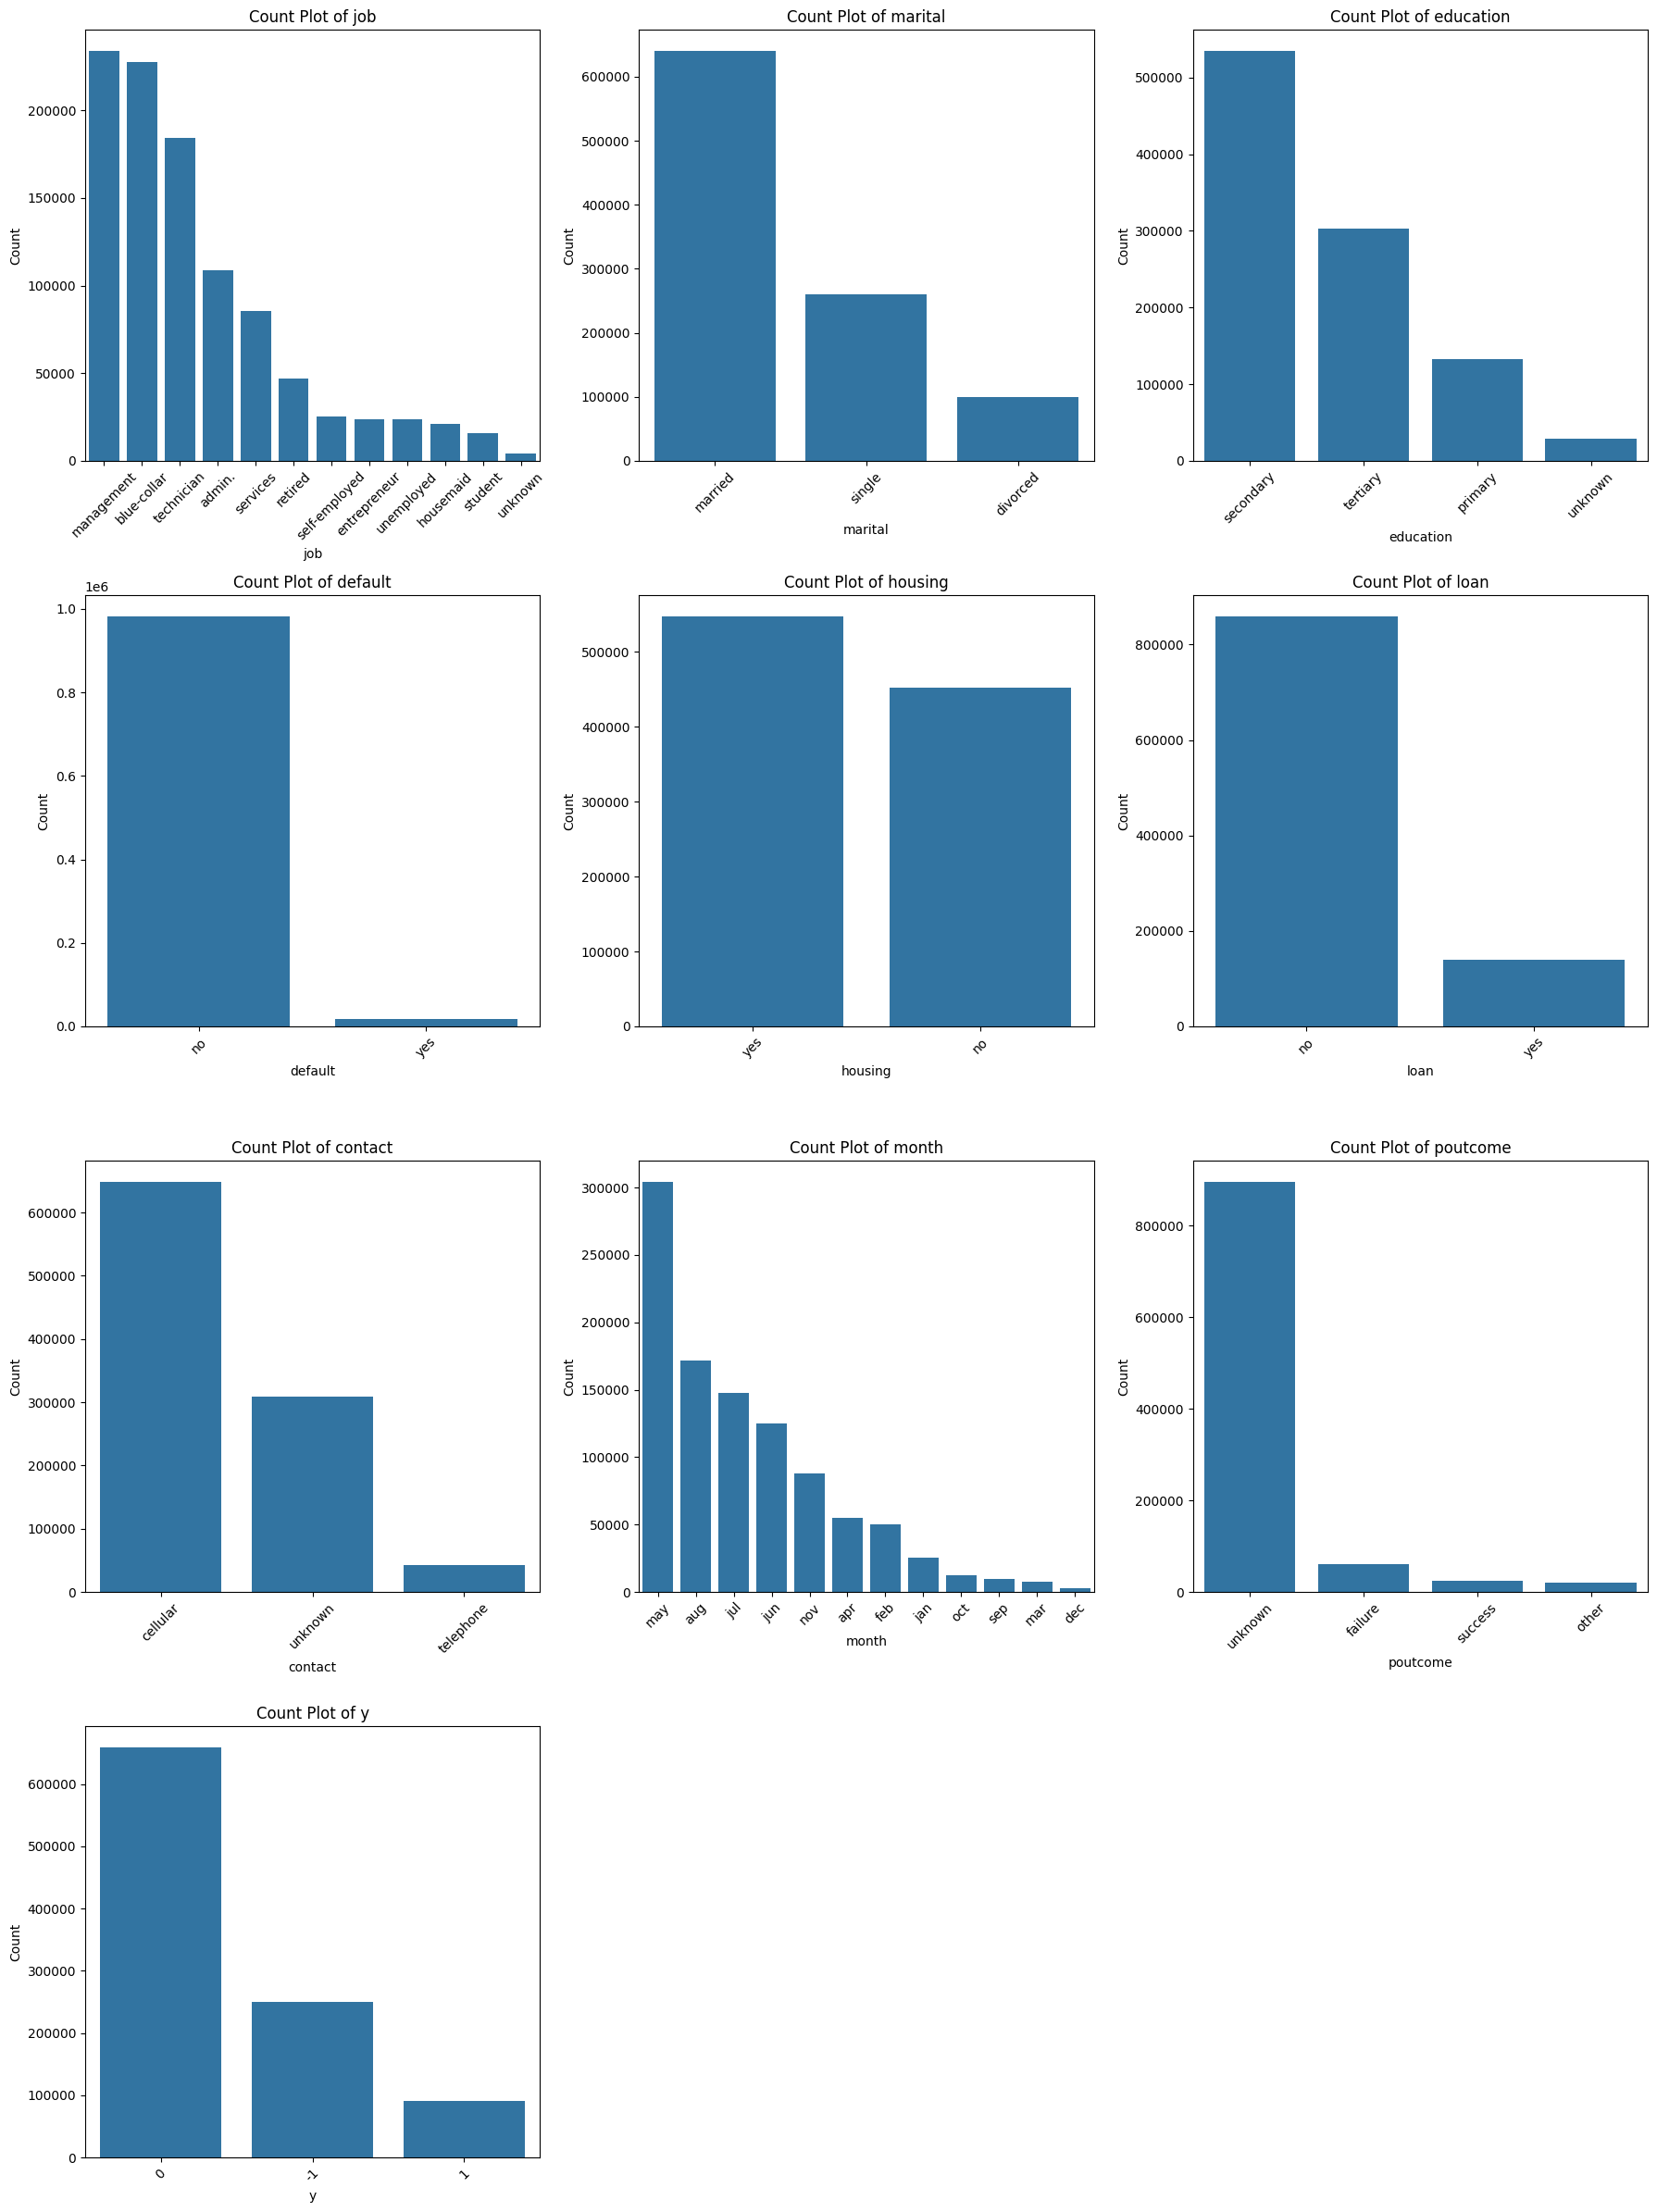

In [69]:
countplot_all_dataframe(all_data_categorical)

## First and fast approach to Feature Engineering

First approach to FE just to make the workflow running

In [ ]:
all_data_fe = all_data.copy(deep=True)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown,-1
249996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure,-1
249997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success,-1
249998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown,-1


In [82]:
# Apply LabelEncoder to all object (categorical) columns
le = LabelEncoder()

all_data_fe = all_data_fe.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

all_data_fe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,4,1,2,0,0,1,0,0,18,9,65,2,-1,0,3,-1
249996,40,7,1,3,0,522,1,0,0,19,9,531,1,189,1,0,-1
249997,63,5,1,0,0,33,0,0,0,3,5,178,1,92,8,2,-1
249998,50,1,1,0,0,2629,1,0,2,30,8,163,2,-1,0,3,-1


## Modeling

array([[0.31168831, 0.81818182, 0.5       , ..., 0.        , 1.        ,
        0.5       ],
       [0.25974026, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.5       ],
       [0.23376623, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.5       ],
       ...,
       [0.58441558, 0.45454545, 0.5       , ..., 0.04      , 0.66666667,
        0.        ],
       [0.41558442, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.72727273, 1.        , ..., 0.        , 1.        ,
        0.        ]])